<a href="https://colab.research.google.com/github/krishhsuri/ML-AI-Projects/blob/main/LSTM_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [4]:
stock_data = yf.download("TATAMOTORS.NS", start="2000-01-01", end="2025-03-03")

[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,
2000-01-03,32.728165,32.803664,31.316363,31.316363,3528277
2000-01-04,31.437166,33.067913,31.104976,32.765921,3544397
2000-01-05,32.199688,32.886714,29.293031,29.293031,5849540
2000-01-06,33.535992,34.713751,32.463925,32.463925,10274966
2000-01-07,36.223705,36.223705,33.686988,33.822886,11477451
...,...,...,...,...,...
2025-02-21,673.200012,690.000000,671.099976,686.000000,14577524
2025-02-24,668.250000,676.599976,666.000000,670.000000,8861769


In [31]:
import pandas as pd

In [33]:
close = stock_data['Close']

In [34]:
import matplotlib.pyplot as plt


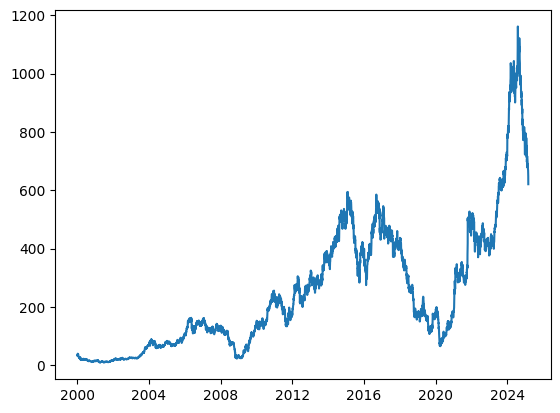

In [35]:
plt.plot(close)

In [36]:
import numpy as np

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(close).reshape(-1,1))

In [42]:
df1.shape

(6282, 1)

In [43]:
df1


array([[0.02054545],
       [0.01942558],
       [0.02008703],
       ...,
       [0.5660591 ],
       [0.55473891],
       [0.53053714]])

In [44]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [45]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_stamp-1):
    a = dataset[i:(i+time_stamp),0]
    dataX.append(a)
    dataY.append(dataset[i+time_stamp,0])
  return np.array(dataX),np.array(dataY)

In [47]:
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [48]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [50]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.summary()
model.compile(loss='mean_squared_error',optimizer='adam')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - loss: 1.9911e-05 - val_loss: 2.7084e-04
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 204ms/step - loss: 2.4269e-05 - val_loss: 2.2207e-04
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - loss: 2.1865e-05 - val_loss: 1.9419e-04
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - loss: 2.3357e-05 - val_loss: 4.4138e-04
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - loss: 2.9657e-05 - val_loss: 2.6249e-04
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - loss: 2.1979e-05 - val_loss: 3.3210e-04
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - loss: 2.6791e-05 - val_loss: 3.2476e-04
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 3.0504e-05 - val_loss: 1.5687e-04
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - loss: 1.9357e-05 - val_loss: 1.4274e-04
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 189ms/step - loss: 1.9860e-05 - val_loss: 2.2298e-04
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━

In [56]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [57]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [58]:
import math
import sklearn.metrics as mean_squared_error
math.sqrt(mean_squared_error.mean_squared_error(y_train,train_predict))

210.9721343103939

In [59]:
math.sqrt(mean_squared_error.mean_squared_error(y_test,test_predict))

478.6755159709774

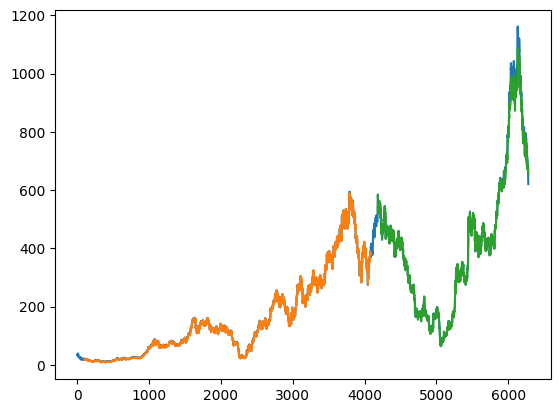

In [61]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: cannot reshape array of size 1 into shape (1,100,1)